In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
filtered_data_2012_2018 = pd.read_csv("C:/Users/user/Desktop/thesis_20240516/uncon_PD/uncon_pd_final_group1.csv", low_memory=False)

In [68]:
filtered_data_2012_2018.rename(columns={'pred_prob': 'default_probability', 'pred_class': 'predicted_class'}, inplace=True)

In [69]:
filtered_data_2012_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305524 entries, 0 to 1305523
Data columns (total 71 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   id                                   1305524 non-null  int64  
 1   loan_amnt                            1305524 non-null  float64
 2   term                                 1305524 non-null  int64  
 3   int_rate                             1305524 non-null  float64
 4   installment                          1305524 non-null  float64
 5   grade                                1305524 non-null  object 
 6   sub_grade                            1305524 non-null  int64  
 7   emp_length                           1305524 non-null  float64
 8   annual_inc                           1305524 non-null  float64
 9   issue_d                              1305524 non-null  object 
 10  loan_status                          1305524 non-null  int64  
 11

In [70]:
# Calculate the average of the 'default_probability' column
average_default_probability = filtered_data_2012_2018['default_probability'].mean()

# Print the average default probability
print("Average Default Probability:", average_default_probability)


Average Default Probability: 0.21867763451631486


In [71]:
# Group by the 'grade' column and calculate the average 'default_probability' for each grade
average_default_probability_by_grade = filtered_data_2012_2018.groupby('grade')['default_probability'].mean()

# Print the average default probability by grade
print("Average Default Probability by Grade:")
print(average_default_probability_by_grade)


Average Default Probability by Grade:
grade
A    0.110142
B    0.179098
C    0.236450
D    0.293897
E    0.346115
F    0.380960
G    0.392655
Name: default_probability, dtype: float64


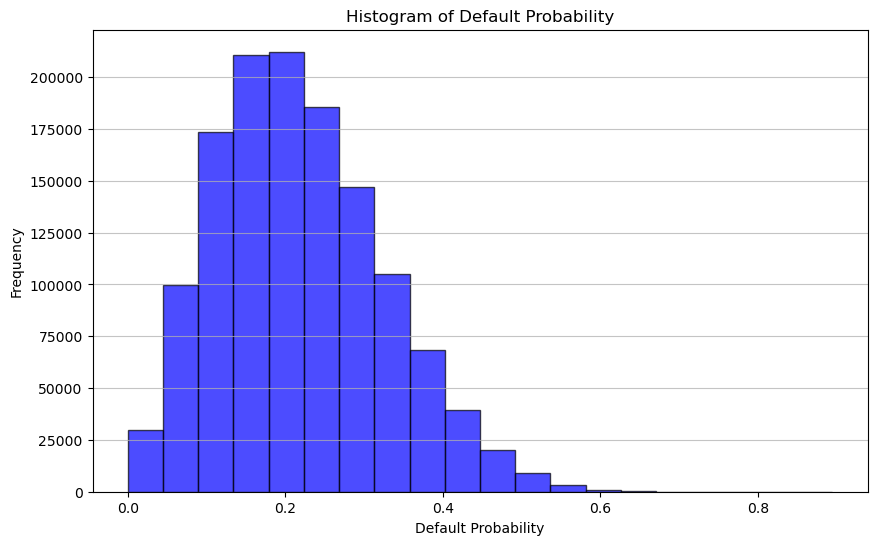

In [72]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'filtered_data_2012_2018' with the 'default_probability' column
# Plotting the histogram of the 'default_probability' column
plt.figure(figsize=(10, 6))
plt.hist(filtered_data_2012_2018['default_probability'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Default Probability')
plt.xlabel('Default Probability')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


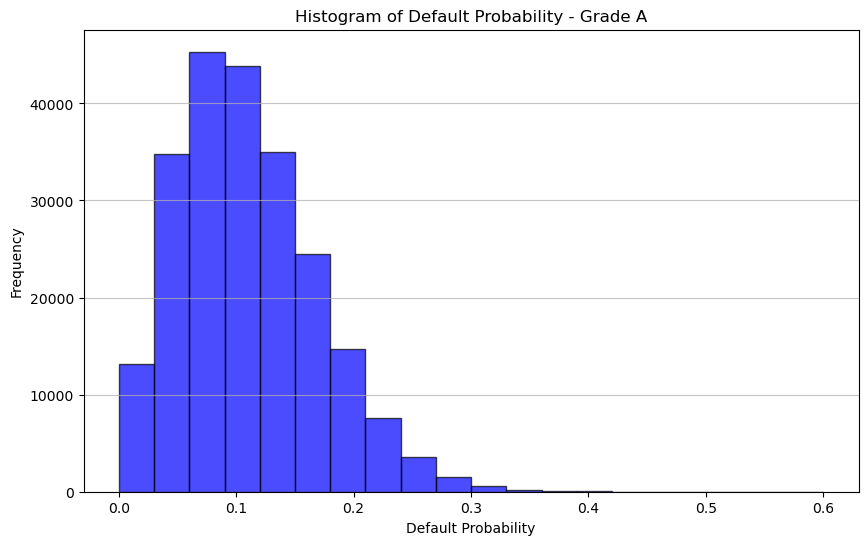

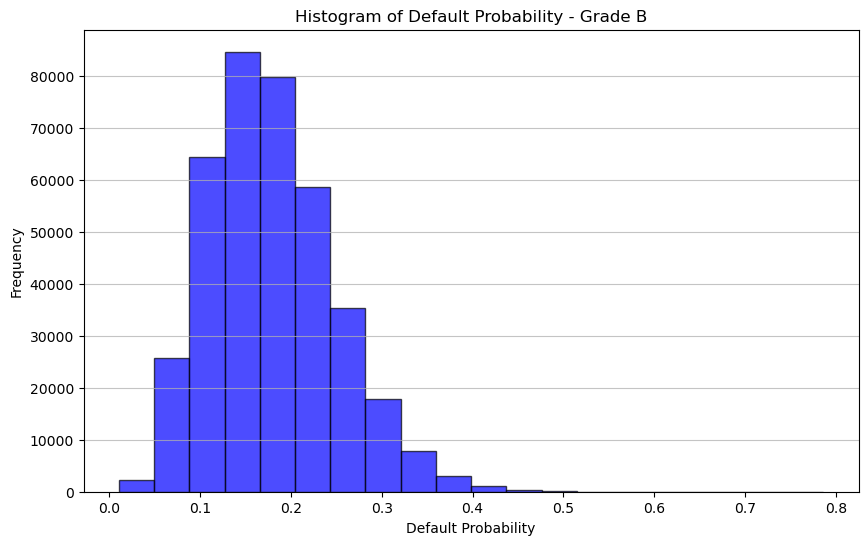

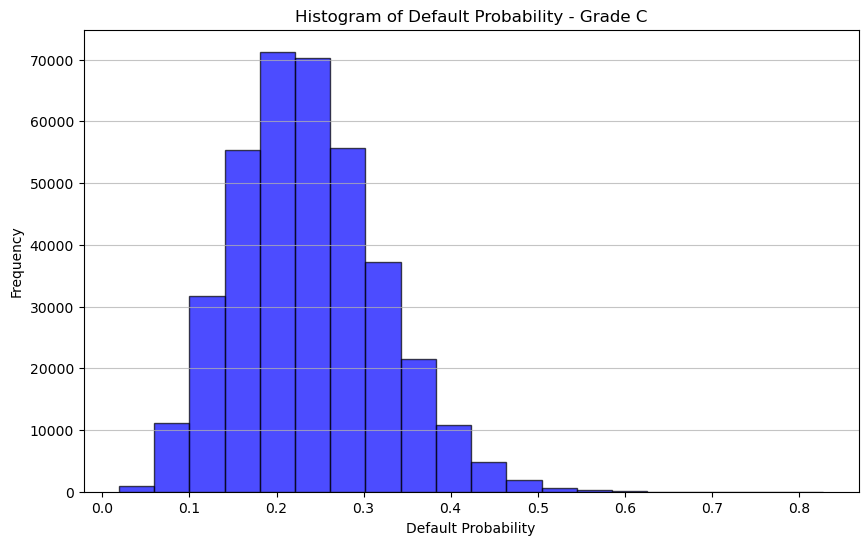

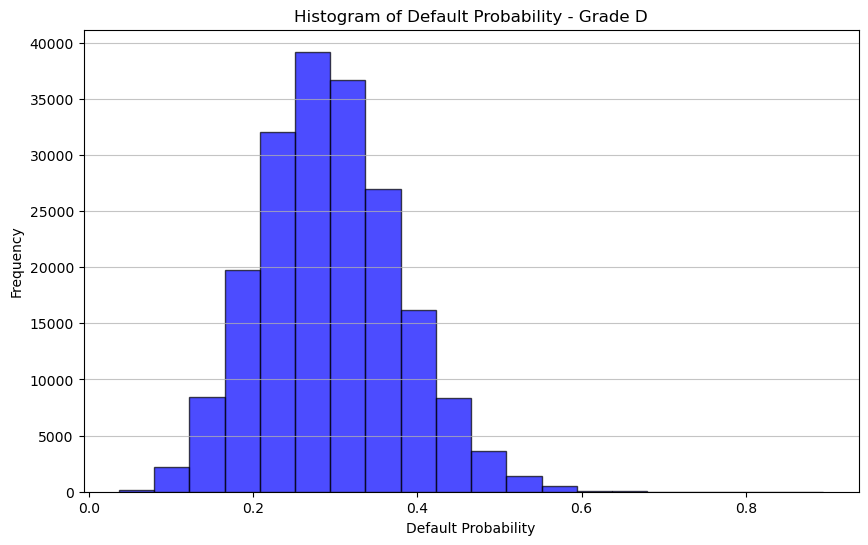

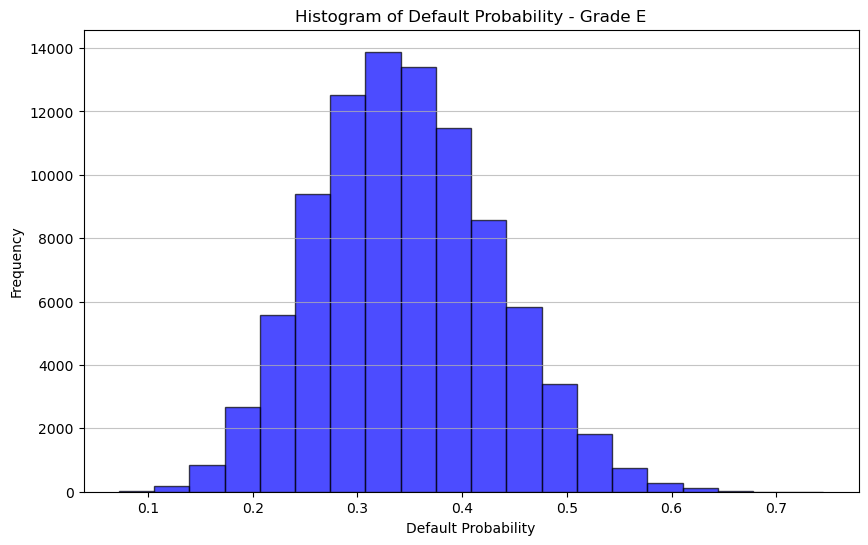

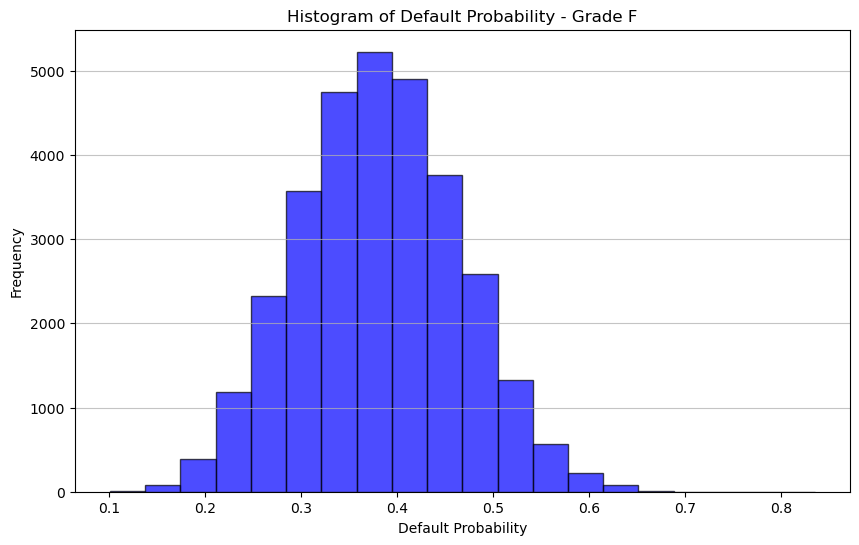

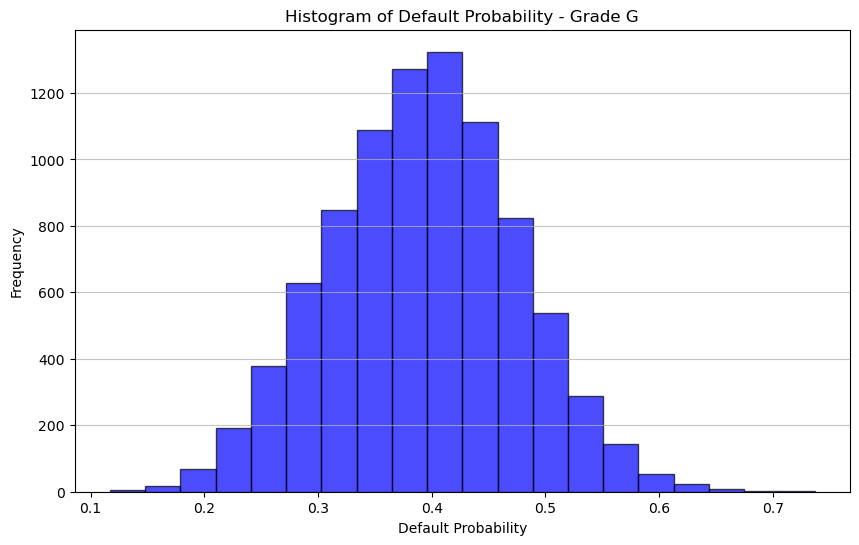

In [73]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'filtered_data_2012_2018' with the 'default_probability' and 'grade' columns
# Get unique grades from the data
grades = filtered_data_2012_2018['grade'].unique()

# Sort the grades to maintain consistent ordering in plots
grades = sorted(grades)

# Create a separate histogram plot for each grade
for grade in grades:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    # Select default_probability for the current grade
    probabilities = filtered_data_2012_2018[filtered_data_2012_2018['grade'] == grade]['default_probability']
    
    # Plot histogram for the current grade
    plt.hist(probabilities, bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Default Probability - Grade {grade}')
    plt.xlabel('Default Probability')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


In [74]:
data_f = pd.read_csv("C:/Users/user/Desktop/thesis_20240516/Data cleaning/thesisdata.csv", low_memory=False)

In [75]:
# Select specified columns from 'filtered_data_2012_2018'
selected_columns = filtered_data_2012_2018[['id', 'loan_amnt', 'grade', 'issue_d', 'loan_status', 'predicted_class', 'default_probability']]

# Convert the 'id' column in both datasets to string
selected_columns['id'] = selected_columns['id'].astype(str)
data_f['id'] = data_f['id'].astype(str)

# Perform an inner join with 'data_f' to include 'total_paynt' based on 'id'
df = pd.merge(selected_columns, data_f[['id', 'total_pymnt']], on='id', how='inner')

# Display the first few rows of the new dataset 'df' to check the results
print(df.head())


C:\Users\user\AppData\Local\Temp\ipykernel_1544\3885010429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['id'] = selected_columns['id'].astype(str)


         id  loan_amnt grade     issue_d  loan_status  predicted_class  \
0  68407277     3600.0     C  2015-12-01            0                0   
1  68355089    24700.0     C  2015-12-01            0                0   
2  68341763    20000.0     B  2015-12-01            0                0   
3  68476807    10400.0     F  2015-12-01            0                0   
4  68426831    11950.0     C  2015-12-01            0                0   

   default_probability   total_pymnt  
0             0.321217   4421.723917  
1             0.310668  25679.660000  
2             0.179222  22705.924294  
3             0.374441  11740.500000  
4             0.245278  13708.948530  


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305524 entries, 0 to 1305523
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id                   1305524 non-null  object 
 1   loan_amnt            1305524 non-null  float64
 2   grade                1305524 non-null  object 
 3   issue_d              1305524 non-null  object 
 4   loan_status          1305524 non-null  int64  
 5   predicted_class      1305524 non-null  int64  
 6   default_probability  1305524 non-null  float64
 7   total_pymnt          1305524 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 79.7+ MB


In [77]:

# 1. Calculate the 'loss' column based on 'loan_status'
df['loss'] = df.apply(lambda row: row['loan_amnt'] - row['total_pymnt'] if row['loan_status'] == 1 else 0, axis=1)

# 2. Convert 'issue_d' to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'])

# 3. Extract year and month from 'issue_d' into 'issue_y' and 'issue_m'
df['issue_y'] = df['issue_d'].dt.year
df['issue_m'] = df['issue_d'].dt.month

# 4. Rename 'loan_amnt' to 'exposure'
df.rename(columns={'loan_amnt': 'exposure'}, inplace=True)

# 5. Rename 'loan_status' to 'actual_class'
df.rename(columns={'loan_status': 'actual_class'}, inplace=True)

# 6. Rename 'default_probability' to 'uncon_PD'
df.rename(columns={'default_probability': 'uncon_PD'}, inplace=True)

# Display the first few rows to confirm changes
print(df.head())


         id  exposure grade    issue_d  actual_class  predicted_class  \
0  68407277    3600.0     C 2015-12-01             0                0   
1  68355089   24700.0     C 2015-12-01             0                0   
2  68341763   20000.0     B 2015-12-01             0                0   
3  68476807   10400.0     F 2015-12-01             0                0   
4  68426831   11950.0     C 2015-12-01             0                0   

   uncon_PD   total_pymnt  loss  issue_y  issue_m  
0  0.321217   4421.723917   0.0     2015       12  
1  0.310668  25679.660000   0.0     2015       12  
2  0.179222  22705.924294   0.0     2015       12  
3  0.374441  11740.500000   0.0     2015       12  
4  0.245278  13708.948530   0.0     2015       12  


In [78]:
# Drop the 'issue_d' and 'total_pymnt' columns from the DataFrame
df = df.drop(['issue_d', 'total_pymnt'], axis=1)

# Display the first few rows to confirm the columns have been removed
print(df.head())


         id  exposure grade  actual_class  predicted_class  uncon_PD  loss  \
0  68407277    3600.0     C             0                0  0.321217   0.0   
1  68355089   24700.0     C             0                0  0.310668   0.0   
2  68341763   20000.0     B             0                0  0.179222   0.0   
3  68476807   10400.0     F             0                0  0.374441   0.0   
4  68426831   11950.0     C             0                0  0.245278   0.0   

   issue_y  issue_m  
0     2015       12  
1     2015       12  
2     2015       12  
3     2015       12  
4     2015       12  


In [79]:
# Calculate the loss rate for each row
df['loss_rate'] = df['loss'] / df['exposure']

# Calculate the weighted average loss rate by grade for the entire dataset
weighted_avg_loss_rate_by_grade = df.groupby('grade').apply(
    lambda g: (g['loss_rate'] * g['exposure']).sum() / g['exposure'].sum()
)
print("Weighted Average Loss Rate by Grade for the entire dataset:")
print(weighted_avg_loss_rate_by_grade)

# Filter the dataset for rows where 'actual_class' is 1
subset_actual_class_1 = df[df['actual_class'] == 1]

# Calculate the weighted average loss rate by grade for the subset where 'actual_class' is 1
weighted_avg_loss_rate_by_grade_actual_class_1 = subset_actual_class_1.groupby('grade').apply(
    lambda g: (g['loss_rate'] * g['exposure']).sum() / g['exposure'].sum()
)
print("Weighted Average Loss Rate by Grade for rows where actual_class is 1:")
print(weighted_avg_loss_rate_by_grade_actual_class_1)

# Calculate the weighted average loss rate for the entire dataset where 'actual_class' is 1
weighted_avg_loss_rate_actual_class_1 = (subset_actual_class_1['loss_rate'] * subset_actual_class_1['exposure']).sum() / subset_actual_class_1['exposure'].sum()
print("Weighted Average Loss Rate for entire dataset where actual_class is 1:")
print(weighted_avg_loss_rate_actual_class_1)

Weighted Average Loss Rate by Grade for the entire dataset:
grade
A    0.027314
B    0.063153
C    0.110997
D    0.151237
E    0.184865
F    0.218507
G    0.253347
dtype: float64
Weighted Average Loss Rate by Grade for rows where actual_class is 1:
grade
A    0.456019
B    0.458867
C    0.473587
D    0.471362
E    0.461602
F    0.466494
G    0.502260
dtype: float64
Weighted Average Loss Rate for entire dataset where actual_class is 1:
0.4680427557302783


In [80]:
# Define the function to calculate correlation based on the given formula
def calculate_correlation(PD):
    # Ensure to handle the PD as a decimal in calculations
    factor = (1 - np.exp(-35 * PD)) / (1 - np.exp(-35))
    correlation = 0.03 * factor + 0.16 * (1 - factor)
    return correlation

# Apply the function to calculate correlation for each row and add it as a new column
df['correlation'] = df['uncon_PD'].apply(calculate_correlation)

# Display the DataFrame to verify the new column
print(df.head())

         id  exposure grade  actual_class  predicted_class  uncon_PD  loss  \
0  68407277    3600.0     C             0                0  0.321217   0.0   
1  68355089   24700.0     C             0                0  0.310668   0.0   
2  68341763   20000.0     B             0                0  0.179222   0.0   
3  68476807   10400.0     F             0                0  0.374441   0.0   
4  68426831   11950.0     C             0                0  0.245278   0.0   

   issue_y  issue_m  loss_rate  correlation  
0     2015       12        0.0     0.030002  
1     2015       12        0.0     0.030002  
2     2015       12        0.0     0.030245  
3     2015       12        0.0     0.030000  
4     2015       12        0.0     0.030024  


In [81]:
# Calculate the weighted average correlation for the entire dataset
total_weighted_average = (df['correlation'] * df['exposure']).sum() / df['exposure'].sum()

# Calculate the weighted average correlation for each grade
grouped_weighted_average = df.groupby('grade').apply(
    lambda x: (x['correlation'] * x['exposure']).sum() / x['exposure'].sum()
)

# Display the results
print("Total Weighted Average Correlation:", total_weighted_average)
print("Weighted Average Correlation by Grade:\n", grouped_weighted_average)

Total Weighted Average Correlation: 0.03232575560388609
Weighted Average Correlation by Grade:
 grade
A    0.040092
B    0.031706
C    0.030553
D    0.030123
E    0.030022
F    0.030007
G    0.030005
dtype: float64


In [82]:
from scipy.stats import norm


correlation = 0.0323

loss_rate = 0.4680427557302783

# Define the confidence levels and their corresponding quantiles
confidence_levels = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.999]

# Create a new DataFrame for the output
df_1 = df.copy()

# Calculate PD at different confidence levels using the Vasicek model
for i, conf_level in enumerate(confidence_levels):
    pd_column_name = f'PD_{int(conf_level * 1000)}'
    quantile = norm.ppf(conf_level)
    df_1[pd_column_name] = norm.cdf(
        (norm.ppf(df_1['uncon_PD']) + quantile * np.sqrt(correlation)) / np.sqrt(1 - correlation)
    )
    
    # Calculate the estimated loss for the confidence level
    estimated_loss_column_name = f'Estimated_Loss_{int(conf_level * 1000)}'
    df_1[estimated_loss_column_name] = df_1[pd_column_name] * df_1['exposure'] * loss_rate

df_12 = df_1

In [83]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305524 entries, 0 to 1305523
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1305524 non-null  object 
 1   exposure            1305524 non-null  float64
 2   grade               1305524 non-null  object 
 3   actual_class        1305524 non-null  int64  
 4   predicted_class     1305524 non-null  int64  
 5   uncon_PD            1305524 non-null  float64
 6   loss                1305524 non-null  float64
 7   issue_y             1305524 non-null  int32  
 8   issue_m             1305524 non-null  int32  
 9   loss_rate           1305524 non-null  float64
 10  correlation         1305524 non-null  float64
 11  PD_700              1305524 non-null  float64
 12  Estimated_Loss_700  1305524 non-null  float64
 13  PD_750              1305524 non-null  float64
 14  Estimated_Loss_750  1305524 non-null  float64
 15  PD_800         

In [56]:
# List of columns to calculate the sum
columns_to_sum = [
    'loss',
    'Estimated_Loss_700',
    'Estimated_Loss_750',
    'Estimated_Loss_800',
    'Estimated_Loss_850',
    'Estimated_Loss_900',
    'Estimated_Loss_950',
    'Estimated_Loss_990',
    'Estimated_Loss_999'
]

# Calculate the sums
sums = df_12[columns_to_sum].sum()

# Convert the series to a DataFrame for nicer display, and transpose it
sum_matrix = pd.DataFrame(sums).transpose()

# Rename index to 'Total Sum' for better understanding
sum_matrix.index = ["Total Sum"]

# Display the DataFrame
print(sum_matrix)

                   loss  Estimated_Loss_700  Estimated_Loss_750  \
Total Sum  1.924245e+09        2.217494e+09        2.289997e+09   

           Estimated_Loss_800  Estimated_Loss_850  Estimated_Loss_900  \
Total Sum        2.372142e+09        2.469717e+09        2.595174e+09   

           Estimated_Loss_950  Estimated_Loss_990  Estimated_Loss_999  
Total Sum        2.786323e+09        3.159859e+09        3.597348e+09  


In [57]:
df_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305524 entries, 0 to 1305523
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1305524 non-null  object 
 1   exposure            1305524 non-null  float64
 2   grade               1305524 non-null  object 
 3   actual_class        1305524 non-null  int64  
 4   predicted_class     1305524 non-null  int64  
 5   uncon_PD            1305524 non-null  float64
 6   loss                1305524 non-null  float64
 7   issue_y             1305524 non-null  int32  
 8   issue_m             1305524 non-null  int32  
 9   loss_rate           1305524 non-null  float64
 10  correlation         1305524 non-null  float64
 11  PD_700              1305524 non-null  float64
 12  Estimated_Loss_700  1305524 non-null  float64
 13  PD_750              1305524 non-null  float64
 14  Estimated_Loss_750  1305524 non-null  float64
 15  PD_800         

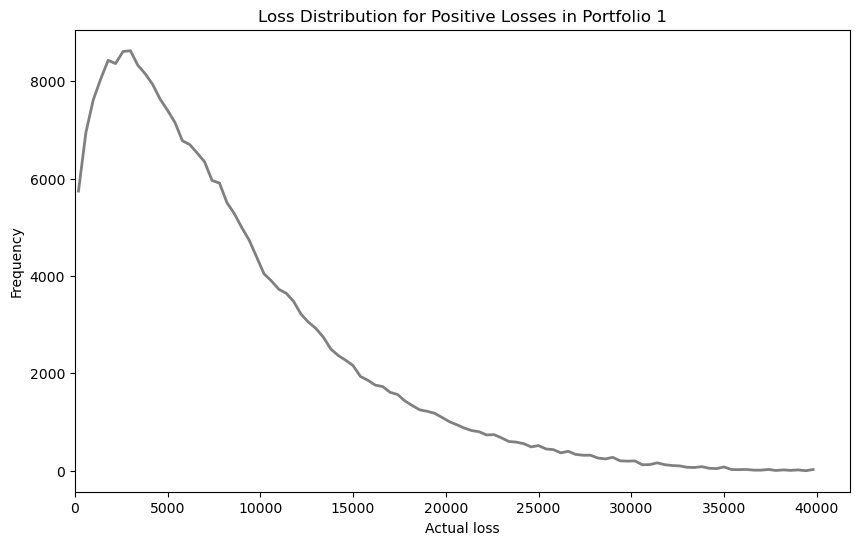

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure column names are stripped of any extra whitespace
df_12.columns = df_12.columns.str.strip()

# Filter the data
filtered_df = df_12[(df_12['actual_class'] == 1) & (df_12['loss'] > 0)]

# Calculate histogram values and bin edges
hist_values, bin_edges = np.histogram(filtered_df['loss'], bins=100)

# Calculate the bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Plot the line plot for histogram
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist_values, color='gray', linewidth=2)
plt.xlabel('Actual loss')
plt.ylabel('Frequency')
plt.title('Loss Distribution for Positive Losses in Portfolio 1')

# Limit the x-axis to show only positive values
plt.xlim(left=0)

# Turn off internal grid lines
plt.grid(False)

plt.show()


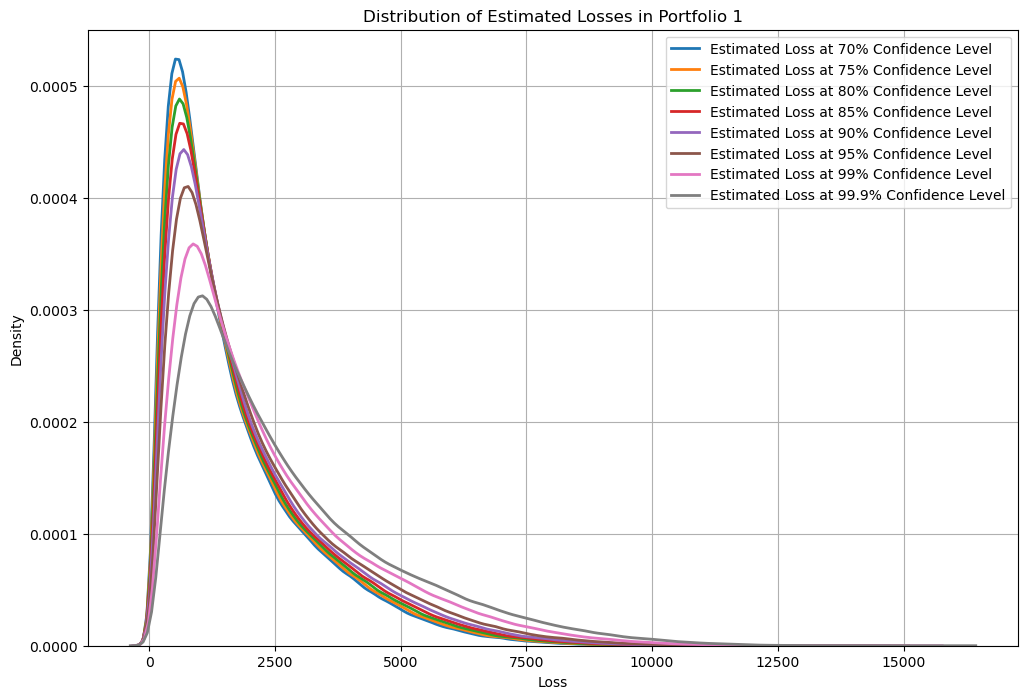

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure column names are stripped of any extra whitespace
df_12.columns = df_12.columns.str.strip()

# List of columns to plot
loss_columns = [
    'Estimated_Loss_700', 'Estimated_Loss_750', 'Estimated_Loss_800', 'Estimated_Loss_850',
    'Estimated_Loss_900', 'Estimated_Loss_950', 'Estimated_Loss_990', 'Estimated_Loss_999'
]

# Rename columns for clarity in the plot
column_names = {
    'Estimated_Loss_700': 'Estimated Loss at 70% Confidence Level',
    'Estimated_Loss_750': 'Estimated Loss at 75% Confidence Level',
    'Estimated_Loss_800': 'Estimated Loss at 80% Confidence Level',
    'Estimated_Loss_850': 'Estimated Loss at 85% Confidence Level',
    'Estimated_Loss_900': 'Estimated Loss at 90% Confidence Level',
    'Estimated_Loss_950': 'Estimated Loss at 95% Confidence Level',
    'Estimated_Loss_990': 'Estimated Loss at 99% Confidence Level',
    'Estimated_Loss_999': 'Estimated Loss at 99.9% Confidence Level'
}

# Plot the distributions
plt.figure(figsize=(12, 8))
for col in loss_columns:
    sns.kdeplot(df_12[col], label=column_names[col], linewidth=2)

plt.xlabel('Loss')
plt.ylabel('Density')
plt.title('Distribution of Estimated Losses in Portfolio 1')
plt.legend()
plt.grid(True)
plt.show()



In [36]:
# Group the DataFrame by 'issue_year' and 'issue_month'
grouped = df_12.groupby(['issue_y', 'issue_m'])

# Initialize a dictionary to store results
results = {
    'loss': [],
    'Estimated_Loss_700': [],
    'Estimated_Loss_750': [], 
    'Estimated_Loss_800': [],
    'Estimated_Loss_850': [],
    'Estimated_Loss_900': [],
    'Estimated_Loss_950': [],
    'Estimated_Loss_990': [],
    'Estimated_Loss_999': []
}

# Calculate sums for each group
for name, group in grouped:
    for key in results.keys():
        results[key].append(group[key].sum())

# Convert to DataFrame for easier comparison
results_df = pd.DataFrame(results, index=grouped.size().index.rename(['Year', 'Month']))

# Frequency of actual loss sum exceeding estimated loss sums
frequencies = {}
for col in results_df.columns[1:]:  # Skip the first column which is 'loss'
    frequencies[col] = np.sum(results_df['loss'] > results_df[col])

frequencies

{'Estimated_Loss_700': 28,
 'Estimated_Loss_750': 28,
 'Estimated_Loss_800': 27,
 'Estimated_Loss_850': 26,
 'Estimated_Loss_900': 21,
 'Estimated_Loss_950': 16,
 'Estimated_Loss_990': 10,
 'Estimated_Loss_999': 0}

In [37]:
from scipy.stats import chi2
# Total number of trials (days)
n = 84
# Observed number of exceedances for each confidence level
exceedances = {'Estimated_Loss_700': 26,
 'Estimated_Loss_750': 28,
 'Estimated_Loss_800': 27,
 'Estimated_Loss_850': 26,
 'Estimated_Loss_900': 21,
 'Estimated_Loss_950': 16,
 'Estimated_Loss_990': 10,
 'Estimated_Loss_999': 0}

# Calculate Kupiec's test statistic and p-value for each confidence level
results = {}
for level, exceptions in exceedances.items():
    # Extract the numeric value from the level key
    confidence_percentage = int(level.split('_')[-1])
    # Calculate p from the confidence percentage
    p = (1000 - confidence_percentage) / 1000
    
    # Handle edge cases for log calculations
    p = max(p, 1e-10)  # prevent log(0)
    q = 1 - p
    q = max(q, 1e-10)  # prevent log(0)
    proportion = exceptions / n
    proportion = max(proportion, 1e-10)  # prevent log(0)
    one_minus_proportion = 1 - proportion
    one_minus_proportion = max(one_minus_proportion, 1e-10)  # prevent log(0)
    
    # Compute the components for the Kupiec test
    ln_part_model = (n - exceptions) * np.log(q) + exceptions * np.log(p)
    ln_part_actual = (n - exceptions) * np.log(one_minus_proportion) + exceptions * np.log(proportion)
    test_statistic = -2 * (ln_part_model - ln_part_actual)
    
    # Calculate the p-value
    p_value = chi2.sf(test_statistic, 1)  # survival function for chi-squared distribution

    # Store the results
    results[level] = {
        'Test Statistic': test_statistic,
        'p-value': p_value,
        'Model Accepted': p_value > 0.05
    }

results

{'Estimated_Loss_700': {'Test Statistic': 0.0360663166666626,
  'p-value': 0.8493786069630354,
  'Model Accepted': True},
 'Estimated_Loss_750': {'Test Statistic': 2.9184960637847865,
  'p-value': 0.08756944650617533,
  'Model Accepted': True},
 'Estimated_Loss_800': {'Test Statistic': 6.853825212957133,
  'p-value': 0.008845169549273875,
  'Model Accepted': False},
 'Estimated_Loss_850': {'Test Statistic': 13.557622030632757,
  'p-value': 0.00023135001588946624,
  'Model Accepted': False},
 'Estimated_Loss_900': {'Test Statistic': 15.511694582676228,
  'p-value': 8.199639684787376e-05,
  'Model Accepted': False},
 'Estimated_Loss_950': {'Test Statistic': 21.037985600381404,
  'p-value': 4.502673689761095e-06,
  'Model Accepted': False},
 'Estimated_Loss_990': {'Test Statistic': 32.26696687450138,
  'p-value': 1.3437852988280997e-08,
  'Model Accepted': False},
 'Estimated_Loss_999': {'Test Statistic': 0.16808403924203238,
  'p-value': 0.6818202262657833,
  'Model Accepted': True}}

In [42]:
df_12.to_csv('vasicek_group1_portfolio1.csv', index=False)